<a href="https://colab.research.google.com/github/LinaSeongyeonSon/Medical-Insurance-Cost-Prediction/blob/main/Medical_Insurance_Cost_Prediction.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

**Data** <br>
This dataset represents the medical insurance costs of individuals in the U.S., providing insights into factors influencing insurance charges. <br>

**Link:** https://www.kaggle.com/datasets/mirichoi0218/insurance/data <br>

**Features:** <br>
1. age: Primary beneficiary's age
2. sex: Gender of the insurance holder (female/male)
3. bmi: Body mass index (kg/m²), indicating weight relative to height
4. children: Number of dependents covered by insurance
5. smoker: Smoking status (yes/no)
6. region: Residential area in the U.S. (northeast, southeast, southwest, northwest)
7. charges: Medical costs billed by insurance

**Libraries**

In [ ]:
# Data loader
from google.colab import drive
import zipfile

# Regular libraries
import pandas as pd
import numpy as np

# Statistical analysis
from scipy.stats import pearsonr

# Visualization
import matplotlib.pyplot as plt
import seaborn as sns

# Data Exploration & Cleaning

In [ ]:
# Load the data
drive.mount('/content/drive')

!kaggle datasets download -d mirichoi0218/insurance

with zipfile.ZipFile("insurance.zip", 'r') as zip_ref:
    zip_ref.extractall("insurance_data")

data = pd.read_csv("insurance_data/insurance.csv")

# Create a copy of the original dataset
df = data.copy()

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).
Dataset URL: https://www.kaggle.com/datasets/mirichoi0218/insurance
License(s): DbCL-1.0
insurance.zip: Skipping, found more recently modified local copy (use --force to force download)


In [ ]:
df.head()

,age,sex,bmi,children,smoker,region,charges
0,19,female,27.900,0,yes,southwest,16884.92400
1,18,male,33.770,1,no,southeast,1725.55230
2,28,male,33.000,3,no,southeast,4449.46200
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.85520


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1338 entries, 0 to 1337
Data columns (total 7 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       1338 non-null   int64  
 1   sex       1338 non-null   object 
 2   bmi       1338 non-null   float64
 3   children  1338 non-null   int64  
 4   smoker    1338 non-null   object 
 5   region    1338 non-null   object 
 6   charges   1338 non-null   float64
dtypes: float64(2), int64(2), object(3)
memory usage: 73.3+ KB


There are no missing values in the dataset.

In [ ]:
df.describe()

,age,bmi,children,charges
count,1338.000000,1338.000000,1338.000000,1338.000000
mean,39.207025,30.663397,1.094918,13270.422265
std,14.049960,6.098187,1.205493,12110.011237
min,18.000000,15.960000,0.000000,1121.873900
25%,27.000000,26.296250,0.000000,4740.287150
50%,39.000000,30.400000,1.000000,9382.033000
75%,51.000000,34.693750,2.000000,16639.912515
max,64.000000,53.130000,5.000000,63770.428010


In [ ]:
# Check for duplicates
print("Number of duplicated rows:", df.duplicated().sum())

# Display duplicated rows
print(df[df.duplicated()])

# Remove duplicates
df = df.drop_duplicates()

Number of duplicated rows: 1
     age   sex    bmi  children smoker     region    charges
581   19  male  30.59         0     no  northwest  1639.5631


# Descriptive Analysis

Focuses on summarizing and presenting key characteristics of the dataset

Charges column

In [ ]:
df['charges'].describe()

,charges
count,1337.000000
mean,13279.121487
std,12110.359656
min,1121.873900
25%,4746.344000
50%,9386.161300
75%,16657.717450
max,63770.428010


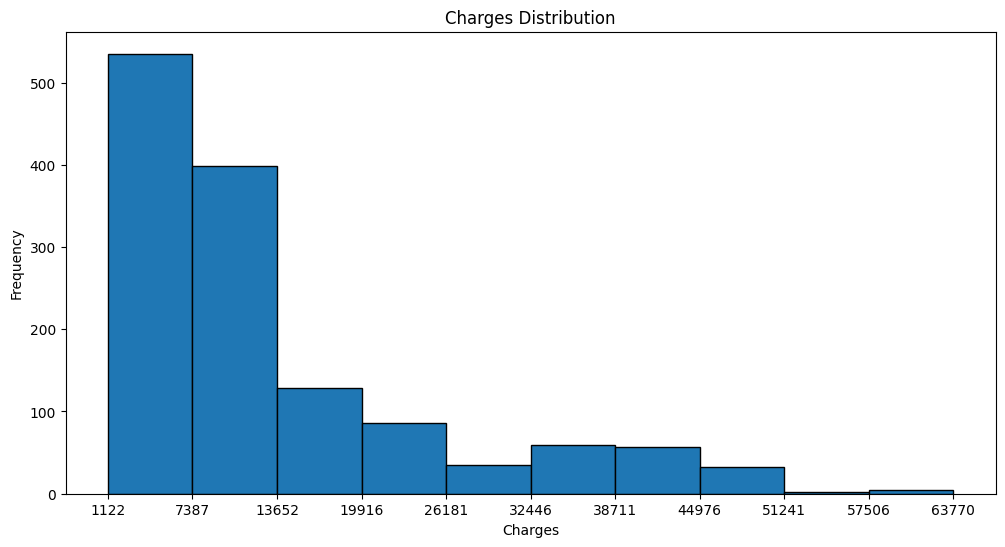

In [ ]:
# Histogram

count, bins = np.histogram(df['charges'])

plt.figure(figsize = (12, 6))
plt.hist(df['charges'], edgecolor = 'black', orientation = 'vertical', align = 'mid')

plt.title('Charges Distribution')
plt.xlabel('Charges')
plt.ylabel('Frequency')

plt.xticks(bins)

plt.show()


Most individuals have medical expenses between 1,122 and 13,652, indicating most fall into the lowest charges category.

Age column

In [ ]:
df['age'].describe()

,age
count,1337.000000
mean,39.222139
std,14.044333
min,18.000000
25%,27.000000
50%,39.000000
75%,51.000000
max,64.000000


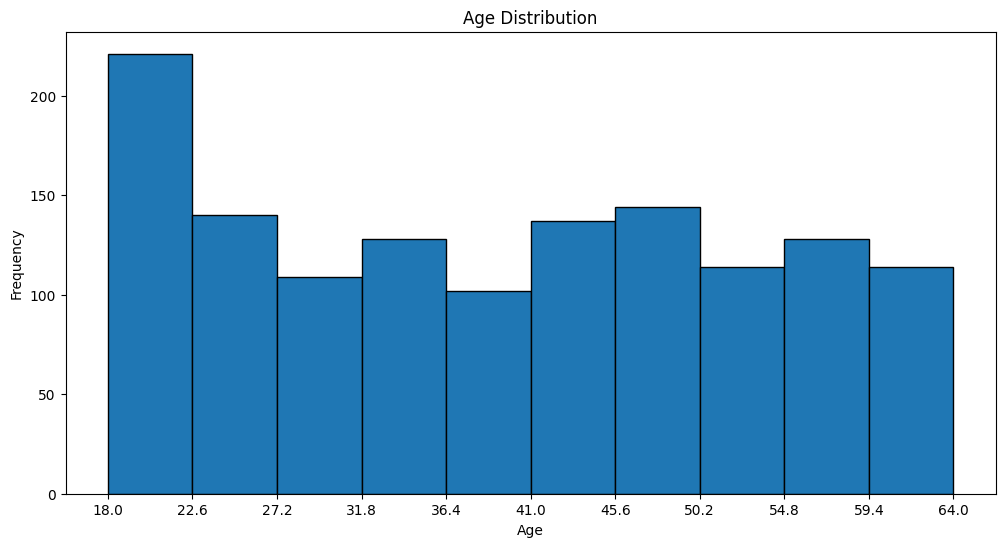

In [ ]:
# Histogram

count, bins = np.histogram(df['age'])

plt.figure(figsize = (12, 6))
plt.hist(df['age'], edgecolor = 'black', orientation = 'vertical', align = 'mid')

plt.title('Age Distribution')
plt.xlabel('Age')
plt.ylabel('Frequency')

plt.xticks(bins)

plt.show()

The 18-22 age group has the highest number of people in the dataset.

Children column

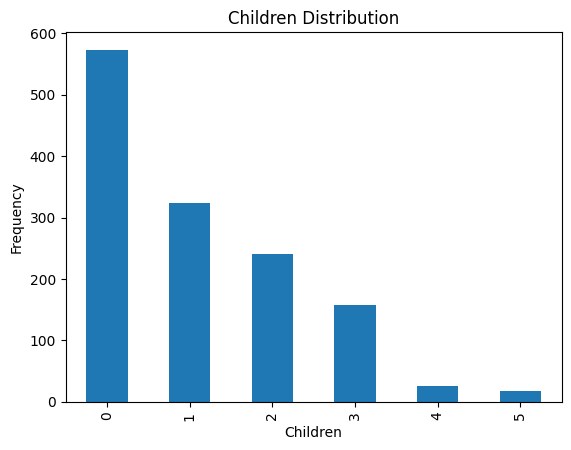

In [ ]:
# Histogram

df['children'].value_counts().plot(kind='bar')

plt.title('Children Distribution')
plt.xlabel('Children')
plt.ylabel('Frequency')

plt.show()

Most people have no children, and the frequency decreases as the number of children increases.

Sex column

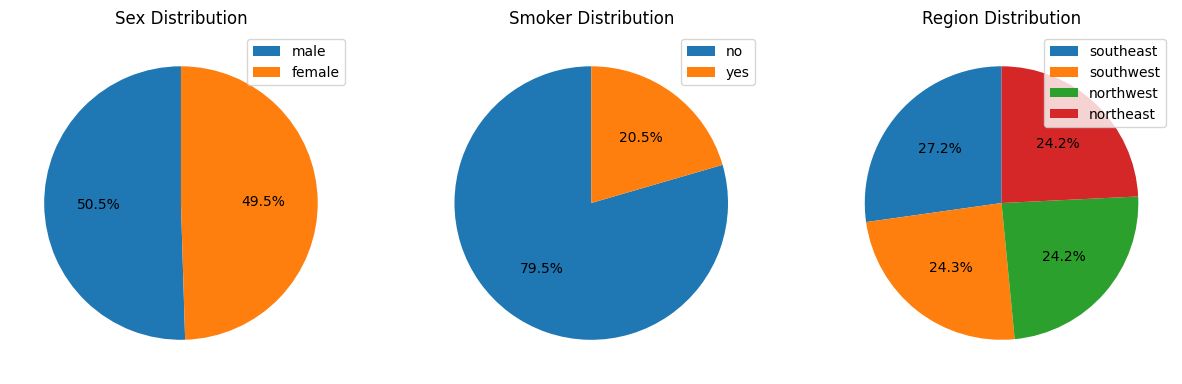

In [ ]:
# Pie Chart

fig, axes = plt.subplots(1, 3, figsize=(15, 10))

# Sex
axes[0].pie((df['sex']).value_counts(), autopct = '%1.1f%%', startangle = 90)
axes[0].set_title('Sex Distribution')
axes[0].legend(labels = df['sex'].value_counts().index, loc = "upper right")

# Smoker
axes[1].pie((df['smoker']).value_counts(), autopct = '%1.1f%%', startangle = 90)
axes[1].set_title('Smoker Distribution')
axes[1].legend(labels = df['smoker'].value_counts().index, loc = "upper right")

# Region
axes[2].pie((df['region']).value_counts(), autopct = '%1.1f%%', startangle = 90)
axes[2].set_title('Region Distribution')
axes[2].legend(labels = df['region'].value_counts().index, loc = "upper right")

* Sex: Almost equal distribution (Male: 50.5%, Female: 49.5%)
* Smoker: Non-smokers (79.5%) significantly outnumber smokers (20.5%)
* Region: Fairly even distribution (Southeast: 27.2%, Southwest: 24.3%, Northwest: 24.3%, Northeast: 24.2%)



BMI column

The BMI column will be categorized for descriptive analysis to examine its distribution and insights.

BMI categories for adults
* Underweight: Less than 18.5
* Healthy Weight: 18.5 to elss than 25
* Overweight: 25 to less than 30
* Obesity: 30 or greater

https://www.cdc.gov/bmi/adult-calculator/bmi-categories.html

In [ ]:
df['bmi'].describe()

,bmi
count,1337.000000
mean,30.663452
std,6.100468
min,15.960000
25%,26.290000
50%,30.400000
75%,34.700000
max,53.130000


In [ ]:
def categorize_bmi(bmi):
    if bmi < 18.5:
        return "Underweight"
    elif bmi < 25:
        return "Healthy Weight"
    elif bmi < 30:
        return "Overweight"
    else:
        return "Obesity"

df['bmi_category'] = df['bmi'].apply(categorize_bmi)

print(df)

      age     sex     bmi  children smoker     region      charges  \
0      19  female  27.900         0    yes  southwest  16884.92400   
1      18    male  33.770         1     no  southeast   1725.55230   
2      28    male  33.000         3     no  southeast   4449.46200   
3      33    male  22.705         0     no  northwest  21984.47061   
4      32    male  28.880         0     no  northwest   3866.85520   
...   ...     ...     ...       ...    ...        ...          ...   
1333   50    male  30.970         3     no  northwest  10600.54830   
1334   18  female  31.920         0     no  northeast   2205.98080   
1335   18  female  36.850         0     no  southeast   1629.83350   
1336   21  female  25.800         0     no  southwest   2007.94500   
1337   61  female  29.070         0    yes  northwest  29141.36030   

        bmi_category  
0         Overweight  
1            Obesity  
2            Obesity  
3     Healthy Weight  
4         Overweight  
...              ... 

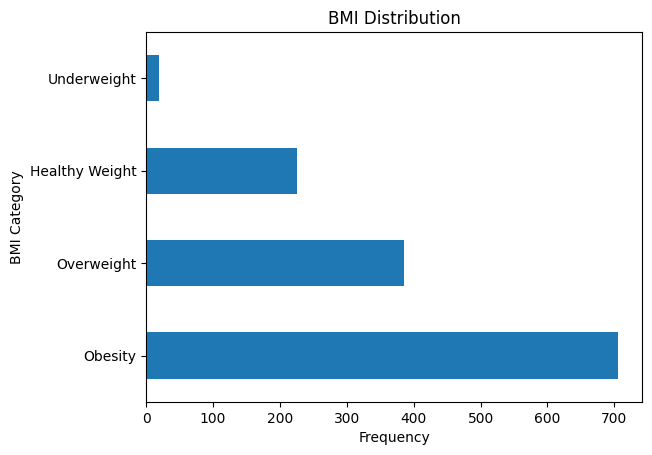

In [ ]:
# Histogram

# Define the order of BMI categories

df['bmi_category'].value_counts().plot(kind='barh')

plt.title('BMI Distribution')
plt.xlabel('Frequency')
plt.ylabel('BMI Category')

plt.show()

The largest group is Obesity, followed by Overweight, Healthy Weight, and Underweight.

Additionally, individuals with higher weight (above healthy weight) significantly outnumber those with healthy or underweight.

Following the univariate analysis, the relationships and patterns between the predictor variables and the target variable (charges) will be explored.

In [ ]:
def avg_charges_by_feature(feature):
  charges = df.groupby(feature).agg(Charge = ('charges', 'mean')).reset_index()
  charges.set_index(feature, inplace=True)
  print(charges)

  charges = charges.transpose()

  viz = charges.plot(kind='bar')
  plt.title(f'{feature.capitalize()} Vs. Charges')

  # Override the defaul x-axis behaviour
  viz.set_xticks([0]) # Sets the location on the x-axis where tick marks should be placed
  viz.set_xticklabels([feature]) # sets the label for the tick mark specified in the previous line

  plt.ylabel('Average Charges')
  plt.xticks(rotation=0)

  plt.show()


              Charge
sex                 
female  12569.578844
male    13974.998864


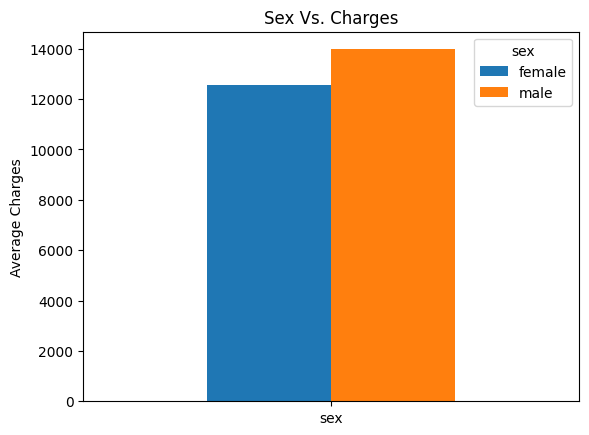

In [ ]:
# Sex Vs. Charges

avg_charges_by_feature('sex')

**Gender and Medical Expenses:** The slight difference in average medical expenses between females and males suggests that sex contributes minimally to the variation in medical expenses (charges), implying that other factors may play a more substantial role in determining charges.

                      Charge
bmi_category                
Healthy Weight  10409.337709
Obesity         15572.041945
Overweight      10987.509891
Underweight      8852.200585


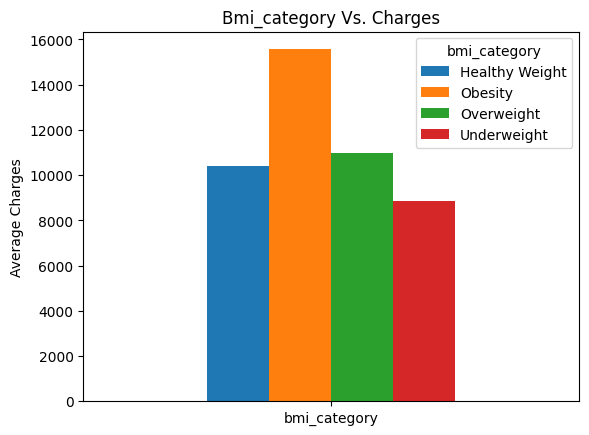

In [ ]:
# BMI Vs. Charges

avg_charges_by_feature('bmi_category')

**BMI and Medical Expenses:** While most BMI categories show relatively similar average medical expenses, individuals categorized as obese have the highest average medical charges, at 15,552.34. This finding underscores the significance of BMI as a predictive variable, particularly highlighting the elevated medical costs associated with obesity.



                Charge
children              
0         12384.695344
1         12731.171832
2         15073.563734
3         15355.318367
4         13850.656311
5          8786.035247


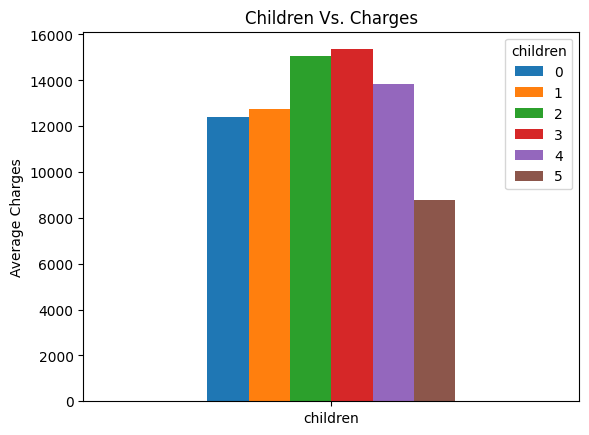

In [ ]:
# Children Vs. Charges

avg_charges_by_feature('children')

**Children and Medical Expenses:** The trend of increasing medical expenses with the number of children, followed by a decline after three children, suggests a non-linear relationship between the number of children and medical expenses. This indicates that while having children may initially increase medical costs, the effect diminishes beyond a certain point.

              Charge
smoker              
no       8440.660307
yes     32050.231832


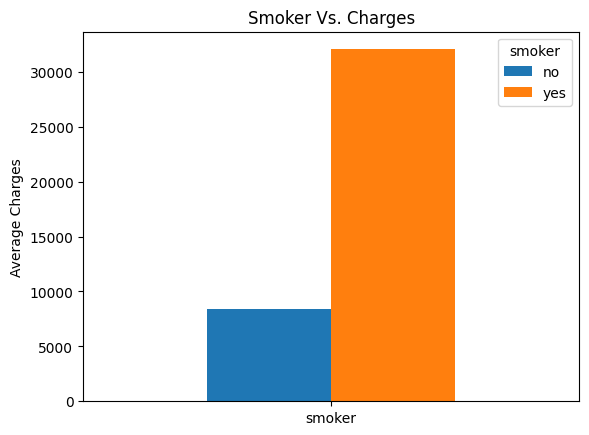

In [ ]:
# Smoker Vs. Charges

avg_charges_by_feature('smoker')

**Smoking and Medical Expenses:** The stark contrast in average medical expenses between smokers (32,050.23) and non-smokers (8,434.27) emphasizes the strong impact of smoking on healthcare costs. This significant difference suggests that smoking is a key determinant of high medical expenses.

                 Charge
region                 
northeast  13406.384516
northwest  12450.840844
southeast  14735.411438
southwest  12346.937377


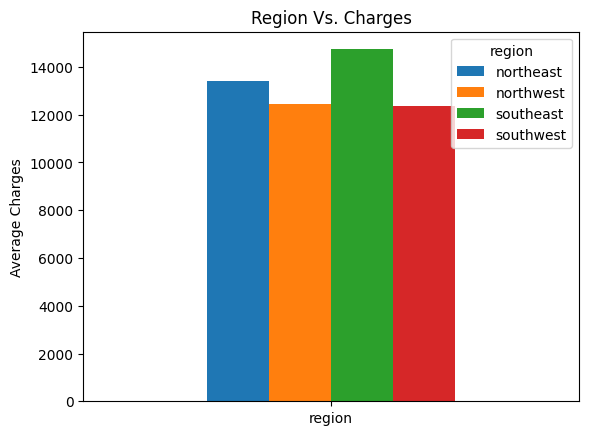

In [ ]:
# Region Vs. Charges

avg_charges_by_feature('region')

**Region and Medical Expenses:** While there are no substantial differences in medical expenses across regions, the Southeast region has the highest average charges (14,735.41), followed closely by the Northeast (13,406.38). These observations indicate regional variations in healthcare costs, though the differences may not be as pronounced as those observed with other features like smoking or BMI.

# Exploratory Data Analysis (EDA)

Focuses on discovering patterns and insights of the dataset

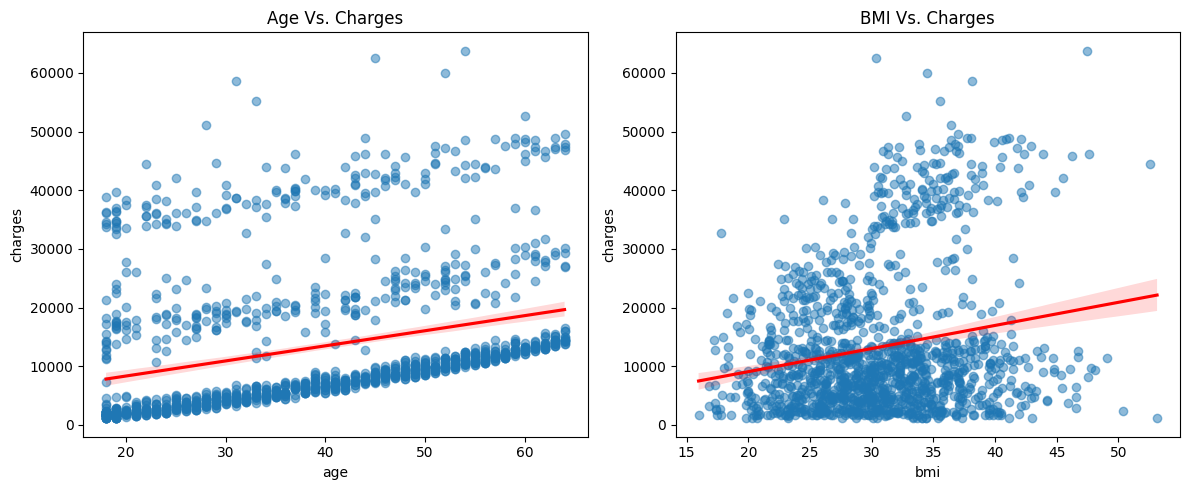

In [ ]:
# Scatter Plot

fig, axes = plt.subplots(1, 2, figsize=(12, 5))

# Age vs Charges
sns.regplot(x=df['age'], y=df['charges'], scatter_kws={'alpha': 0.5}, line_kws={'color': 'red'}, ax=axes[0])
axes[0].set_title("Age Vs. Charges")

# BMI vs Charges
sns.regplot(x=df['bmi'], y=df['charges'], scatter_kws={'alpha': 0.5}, line_kws={'color': 'red'}, ax=axes[1])
axes[1].set_title("BMI Vs. Charges")

plt.tight_layout()
plt.show()


**Age Vs. Charges**
* The positive trendline suggests that medical charges tend to increase with age.
* There is a clear separation between different clusters of charges, which might be due to other factors such as smoking.

**BMI Vs. Charges**
* The trendline also shows a positive correlation - higher BMI tends to be associated with higher medical charges.
* However, the spread of points is wide, meaning BMI alone does not strongly predict medical costs.
* A large group of individuals remains at low charges, while some with high BMI show very high medical costs, possibly due to obesity-related conditions.

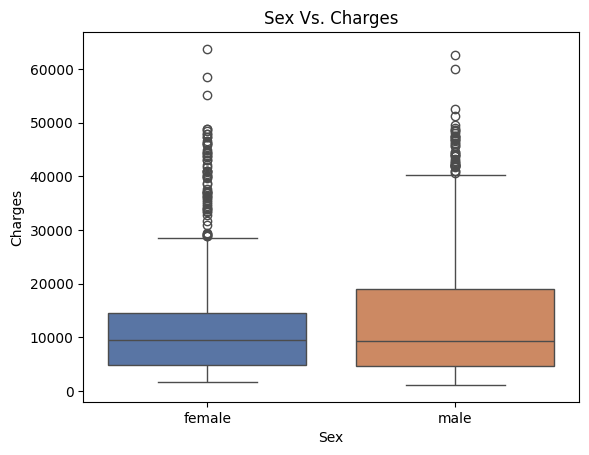

In [ ]:
# Sex Vs. Charges

def boxplot(feature):
    sns.boxplot(x=df[feature], y=df['charges'], hue=df[feature], palette='deep', legend=False)
    plt.title(f'{feature.capitalize()} Vs. Charges')
    plt.xlabel(feature.capitalize())
    plt.ylabel('Charges')
    plt.show()

boxplot('sex')

1. Sex Vs. Charges
* The median medical charges for males and females appear to be similar.
* The spread (interquartile range) is almost identical for both genders.
* There are many outliers in both categories, with some indivisuals having significantly high charges.
* This suggests that sex may not be a mojor factor in determining medical charges.

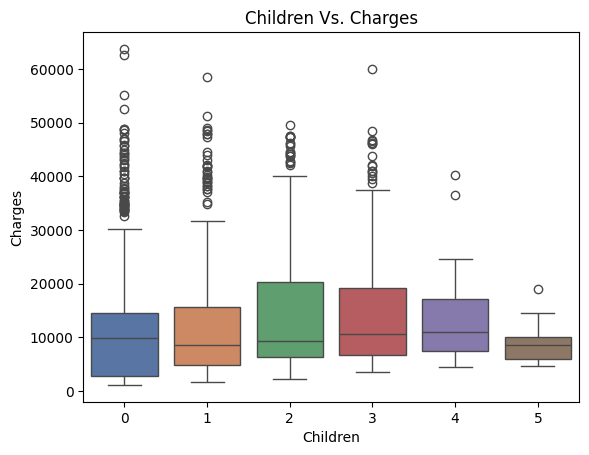

In [ ]:
# Children Vs. Charges

boxplot('children')

2. Children Vs. Charges
* The median charges remain fairly consistent across different number of children.
* Individuals with 2 or 3 children seem to have a slightly higher median charge than those with 0 or 1 child.
* The presence of outliers suggests that some indivisuals, regarless of the number of children, have very high medical costs.
* Having more children does not strongly correlate with an increase in medical charges.

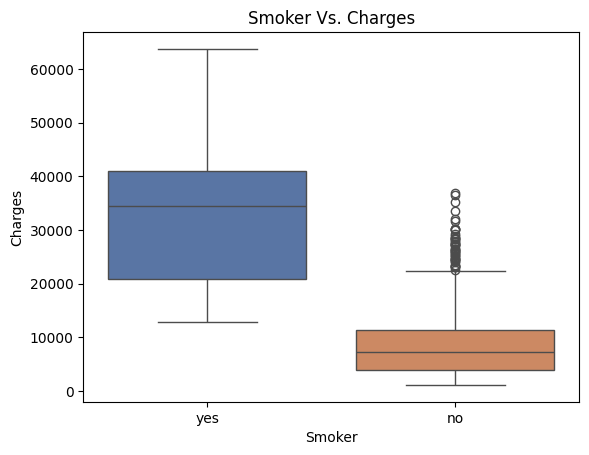

In [ ]:
# Smoker Vs. Charges

boxplot('smoker')

3. Smoker Vs. Charges
* Smokers have significantly higher medical charges compared to non-smokers.
* The median charge for smokers is much higher, and their interquartile range is wider.
* The presence of extreme outliers among smokers indicates that some individuals face exceptionally high medical costs.
* Non-smokers generally have lower charges, with fewer extreme values.
* This suggests that smoking status is a strong predictor of higher medical expenses.

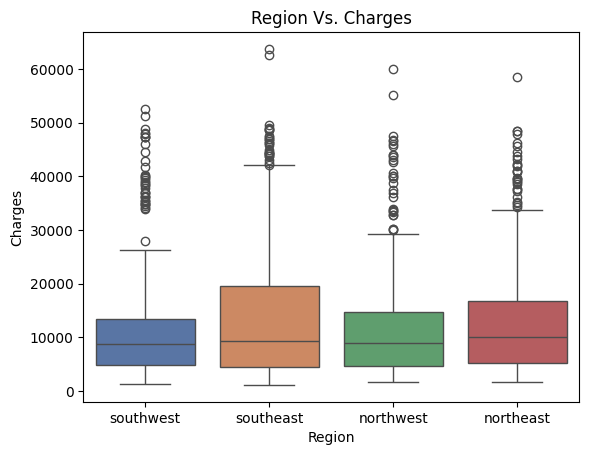

In [ ]:
# Region Vs. Charges

boxplot('region')

4. Region Vs. Charges
* The median charges appear similar across all four regions (southwest, southeast, northwest, northeast).
* The distribution of charges is quite comparable across regions, with no significant differences in variability.
* Outliers exist in all regions, but tehy are not concentrated in any specific region.
* This indicates that geographical region does not have a strong influence on medical charges.

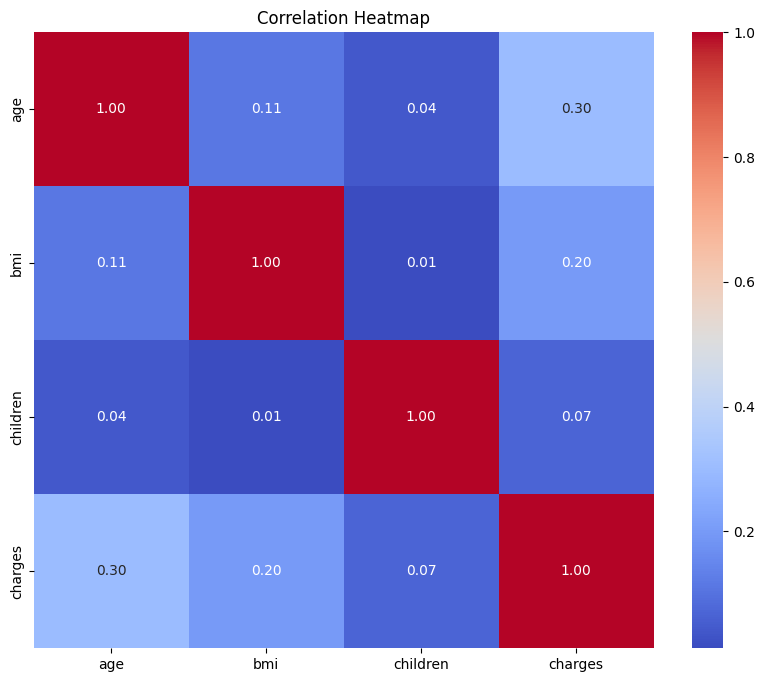

In [ ]:
# Heatmap

def heatmap():
  numeric_df = df.select_dtypes(include=['number'])
  correlation_matrix = numeric_df.corr()

  plt.figure(figsize=(10, 8))
  sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f")

  plt.title('Correlation Heatmap')
  plt.show()

heatmap()

* Age Vs. Charges (0.30): Moderate positive correlation – older individuals tend to have higher charges.
* BMI Vs. Charges (0.20): Weak positive correlation – higher BMI slightly increases charges.
* Children Vs. Charges (0.07): Almost no correlation – having more children does not significantly impact charges.
* ge Vs. BMI (0.11): Weak correlation – age and BMI are mostly independent.
Children vs. Other Variables (≤ 0.07): Negligible correlation – the number of children has little influence on age, BMI, or charges.

In [ ]:
# P values

def p_values(df):
  # Get the number of variables
  num_vars = df.shape[1]

  # Create a matrix to hold the p-values
  p_values_matrix = np.ones((num_vars, num_vars))

  # Loop through each pair of variables
  for i in range(num_vars):
    for j in range(i+1, num_vars):
      # Calculate the Pearson correlation coefficient and p-value
      _, p_value = pearsonr(df.iloc[:, i], df.iloc[:, j])
      p_values_matrix[i, j] = p_value
      p_values_matrix[j, i] = p_value

  # Convert p_values matrix into a DataFrame
  p_values_df = pd.DataFrame(p_values_matrix, index=df.columns, columns=df.columns)

  return p_values_df

numeric_df = df.select_dtypes(include=['number'])
p_values_df = p_values(numeric_df)

print(p_values_df)


                   age           bmi  children       charges
age       1.000000e+00  6.164372e-05  0.129013  6.975749e-29
bmi       6.164372e-05  1.000000e+00  0.641246  2.468040e-13
children  1.290128e-01  6.412463e-01  1.000000  1.371703e-02
charges   6.975749e-29  2.468040e-13  0.013717  1.000000e+00


A p-value helps determine if a result is statiscally significant. A low p-value (typically < 0.05) indicates the observed effect is unlikely to be due to change, suggesting a meaningful relationship. A high p-value suggests the result may be due to random variation, and the relationship is not statistically significant.

**1. Age Vs. Charges**
* Correlation = 0.30 (weak positive correlation)
* P-value = 6.98e-29 (extremely low)

The p-value is very small, meaning the correlation is statistically significan. The correlation suggests that as age increases, charges tend to increase slightly, however the relationship is not strong. To sum up, although statiscally significant, the weak correlation indicates that age has a minor infuence on medical charges, yet it is an important factor.

**2. BMI Vs. Charges**
* Correlation = 0.20 (weak positive correlation)
* P-value = 2.46e-13 (extremely low)

While there is a statistically significant relationship, the weak correlation means that BMI may have a small but real influence on charges, however it's not a strong predictor.

**3. Children Vs. Charges**
* Correlation = 0.07 (very weak positive correlation)
* P-value = 0.0137 (below 0.05)

The correlation value of 0.07 is very small, indicating a very weak positive relationship between the number of children and charges. This suggests that while there is a statistically significant relationship, the number of children has an almost negligible influence on medical charges.